**Estudiante:** Juan Diego Valdivia Mendoza

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# **Conservación de la Energía Mecánica**


## **Objetivo**

El objetivo de esta práctica es resolver la ecuación de calor y la ecuación de onda utilizando el método de diferencias finitas. Se busca obtener soluciones numéricas para estas ecuaciones en función de las condiciones de contorno y condiciones iniciales, con el propósito de analizar el comportamiento de estas ecuaciones en el tiempo y el espacio.

## **Desarrollo**

La ecuación de calor en una dimensión se describe como:

∂u/∂t = α ∂²u/∂x²

Donde:

u(x,t) es la temperatura en la posición x y el tiempo t,
α es la difusividad térmica del material.
Método de Diferencias Finitas
Para resolver esta ecuación utilizando el método de diferencias finitas, discretizamos las variables x y t. Esto nos da la siguiente aproximación en el tiempo y espacio:

u_i^(n+1) = u_i^n + (α Δt / Δx²) * (u_(i+1)^n - 2u_i^n + u_(i-1)^n)

Donde:

Δx es el paso en el espacio,
Δt es el paso en el tiempo.


### **Ecuación de Calor**

In [11]:
L = 10.0  # Longitud de la barra (m)
T = 2.0  # Tiempo total (s)
Nx = 50  # Número de divisiones en x
Nt = 200  # Número de pasos de tiempo
alpha = 0.01  # Difusividad térmica

In [12]:
# Discretización espacial y temporal
dx = L / (Nx - 1)
dt = T / Nt
r = alpha * dt / dx**2  # Número de Courant

In [13]:
# Condiciones iniciales y de contorno
u = np.zeros(Nx)  # Temperatura inicial
u_new = np.zeros(Nx)
u[int(Nx/4):int(3*Nx/4)] = 100  # Condición inicial (temperatura elevada en el medio)
u_new[0] = u_new[-1] = 0  # Condiciones de contorno (temperatura en los extremos)

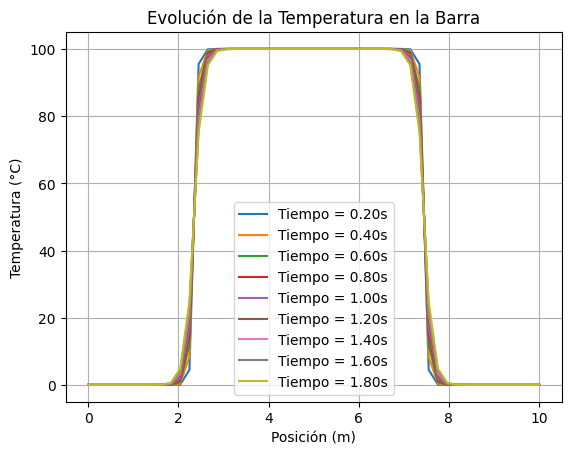

In [14]:
for n in range(1, Nt):
    for i in range(1, Nx-1):
        u_new[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])

    # Actualización de los valores
    u[:] = u_new[:]

    # Visualización de la evolución de la temperatura
    if n % 20 == 0:  # Graficar cada 20 pasos de tiempo
        plt.plot(np.linspace(0, L, Nx), u, label=f'Tiempo = {n*dt:.2f}s')

plt.title('Evolución de la Temperatura en la Barra')
plt.xlabel('Posición (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

## **Explicación del código:**

1. **Parámetros iniciales:** Se define la longitud de la barra, el tiempo total de simulación, el número de pasos espaciales y temporales, y la difusividad térmica.
2. **Discretización:** El espacio y el tiempo se discretizan en pasos
Δ𝑥 y Δ𝑡.
3. **Condiciones iniciales:** Se asume que la barra empieza con temperatura 0, excepto en el medio donde se aplica una temperatura inicial elevada.
4. **Evolución temporal:** En cada paso de tiempo, la temperatura en cada punto de la barra se actualiza según la fórmula de diferencias finitas.
5. **Visualización:** Se grafican las soluciones de temperatura para diferentes instantes de tiempo.

### **Ecuación de Onda**

La ecuación de onda unidimensional en su forma más simple es:

∂²u/∂t² = c² ∂²u/∂x²

Donde:

u(x,t) es el desplazamiento de la onda,
c es la velocidad de la onda.
Método de Diferencias Finitas
La discretización de esta ecuación nos da la siguiente fórmula para la solución:

u_i^(n+1) = 2u_i^n - u_i^(n-1) + (c² Δt² / Δx²) * (u_(i+1)^n - 2u_i^n + u_(i-1)^n)

In [15]:
L = 10.0  # Longitud de la cuerda (m)
T = 2.0  # Tiempo total (s)
Nx = 50  # Número de divisiones en x
Nt = 200  # Número de pasos de tiempo
c = 1.0  # Velocidad de la onda

In [16]:
# Discretización espacial y temporal
dx = L / (Nx - 1)
dt = T / Nt
r = c * dt / dx

# Condiciones iniciales y de contorno
u = np.zeros(Nx)  # Desplazamiento inicial
u_new = np.zeros(Nx)
u_old = np.zeros(Nx)
u[int(Nx/4):int(3*Nx/4)] = 1  # Condición inicial (desplazamiento en el medio)
u_new[0] = u_new[-1] = 0  # Condiciones de contorno (desplazamiento en los extremos)
u_old[0] = u_old[-1] = 0

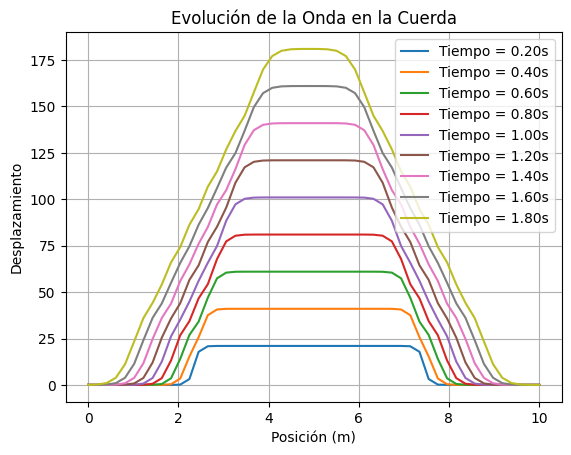

In [17]:
for n in range(1, Nt):
    for i in range(1, Nx-1):
        u_new[i] = 2*u[i] - u_old[i] + r**2 * (u[i+1] - 2*u[i] + u[i-1])

    # Actualización de los valores
    u_old[:] = u[:]
    u[:] = u_new[:]

    # Visualización de la evolución de la onda
    if n % 20 == 0:  # Graficar cada 20 pasos de tiempo
        plt.plot(np.linspace(0, L, Nx), u, label=f'Tiempo = {n*dt:.2f}s')

plt.title('Evolución de la Onda en la Cuerda')
plt.xlabel('Posición (m)')
plt.ylabel('Desplazamiento')
plt.legend()
plt.grid(True)
plt.show()

## **Resultados**

### **Ecuación de Calor:**
Se observa cómo la temperatura de la barra evoluciona con el tiempo, distribuyéndose de manera uniforme a medida que el calor se difunde a lo largo de la barra.

### **Ecuación de Onda:**
La cuerda oscila debido a la propagación de la onda, y el comportamiento de la onda se puede observar en función del tiempo, mostrando cómo se refleja y se propaga.


## **Conclusión**

* **Ecuación de Calor:** La solución muestra que la temperatura se distribuye uniformemente con el tiempo, lo cual es consistente con el fenómeno de difusión del calor.

* **Ecuación de Onda:** La solución muestra la propagación de la onda a través de la cuerda, con reflejos en los extremos, lo que es consistente con el comportamiento esperado de las ondas en medios elásticos.